In [14]:
import pulp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
RANDOM_STATE = 7

In [25]:
train = pd.DataFrame.from_csv('marketing_dataset/train.csv')
train

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


In [17]:
wszystkie=np.array(train)
X=wszystkie[:,:-1]
y=wszystkie[:,-1]

In [18]:
X

array([[60, 'services', 'married', ..., 761, 1, 'other'],
       [25, 'student', 'single', ..., 180, 2, 'failure'],
       [38, 'services', 'married', ..., 344, 1, 'failure'],
       ..., 
       [32, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [50, 'management', 'married', ..., 98, 2, 'other'],
       [33, 'management', 'single', ..., -1, 0, 'unknown']], dtype=object)

In [19]:
y

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

In [20]:
#podział zbioru testowego

X2, X_test, y2, y_test = train_test_split(X, y,
                                        test_size=0.10,
                                        random_state=RANDOM_STATE)

X_train, X_valid, y_train, y_valid = train_test_split(X2, y2,
                                        test_size=0.80,
                                        random_state=RANDOM_STATE)

In [26]:
#próba wizualizacji
df = pd.read_csv('marketing_dataset/train.csv')



In [27]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0  age            job   marital  education default  balance  \
0              0   60       services   married   tertiary      no     4256   
1              1   25        student    single  secondary      no      154   
2              2   38       services   married  secondary      no      507   
3              3   40     management    single   tertiary      no     1361   
4              4   39     technician   married  secondary      no      834   
5              5   36     management   married   tertiary      no     2987   
6              6   40   entrepreneur   married   tertiary      no     1953   
7              7   51       services    single  secondary      no      513   
8              8   51        retired   married    primary      no     1495   
9              9   38     management    single   tertiary      no     6836   
10            10   45     management   married  secondary      no     5888   
11            11   55     technici

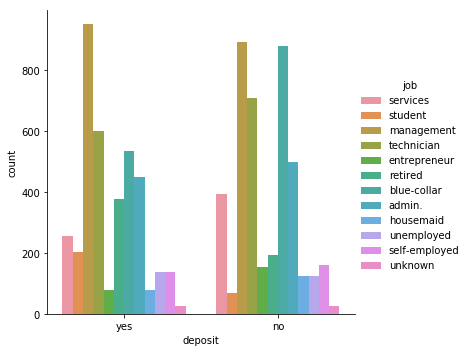

In [31]:
sns.catplot('deposit',data=train, hue='job', kind='count')

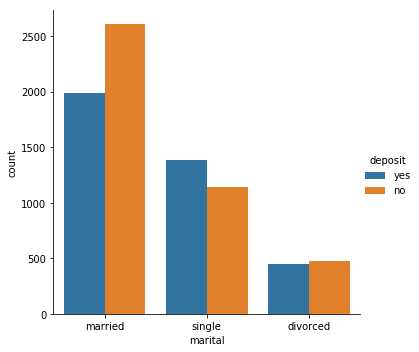

In [33]:
sns.catplot('marital',data=train, hue='deposit', kind='count')

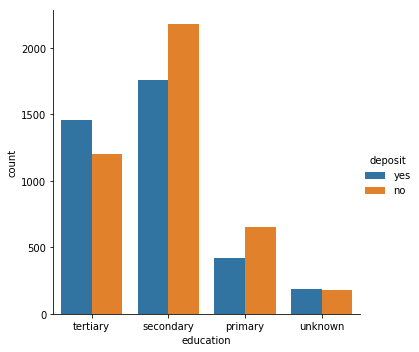

In [34]:
sns.catplot('education',data=train, hue='deposit', kind='count')

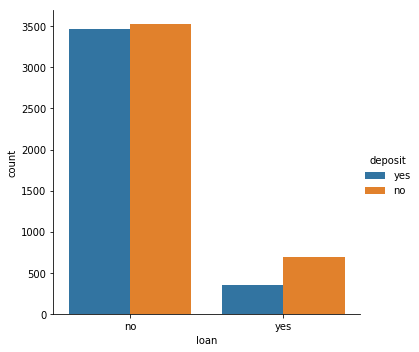

In [36]:
sns.catplot('loan',data=train, hue='deposit', kind='count')